# Guía 5 - Filtros

## Ejercicio 1

Diseñe un filtro FIR mediante el método de ventanas (implementado por usted mismo), que permita eliminar el ruido de línea en una señal que fue muestreada a 300 Hz. Compare los resultados obtenidos con diferentes ventanas de truncado y diferentes cantidades de muestras en la respuesta al impulso.

### Solución

Para crear un filtro FIR, debemos seguir los pasos:
1. Definir frecuencias que se desea eliminar: pasa bajo $[0,f]$, pasa alto $[f,f_m]$, pasa banda $[f_1,f_2]$, rechaza banda $[0,f_1)(f_2,f_m]$
2. Antitransformar
3. Aplicar ventana de N muestras (cualquiera)
4. Aplicar desplazamiento de $\frac{N-1}{2}$ muestras. Para esto utilizar la propiedad de retardo de la TDF
$$x[n-i] \xLeftrightarrow{\mathcal{F}} X[k]e^{-j\omega i}$$
Obviamente vamos a aplicarlo antes de antitransformar, pero se menciona aca para que se entienda el por qué.

5. Obtener respuesta al impulso

#### Filtro rechaza banda

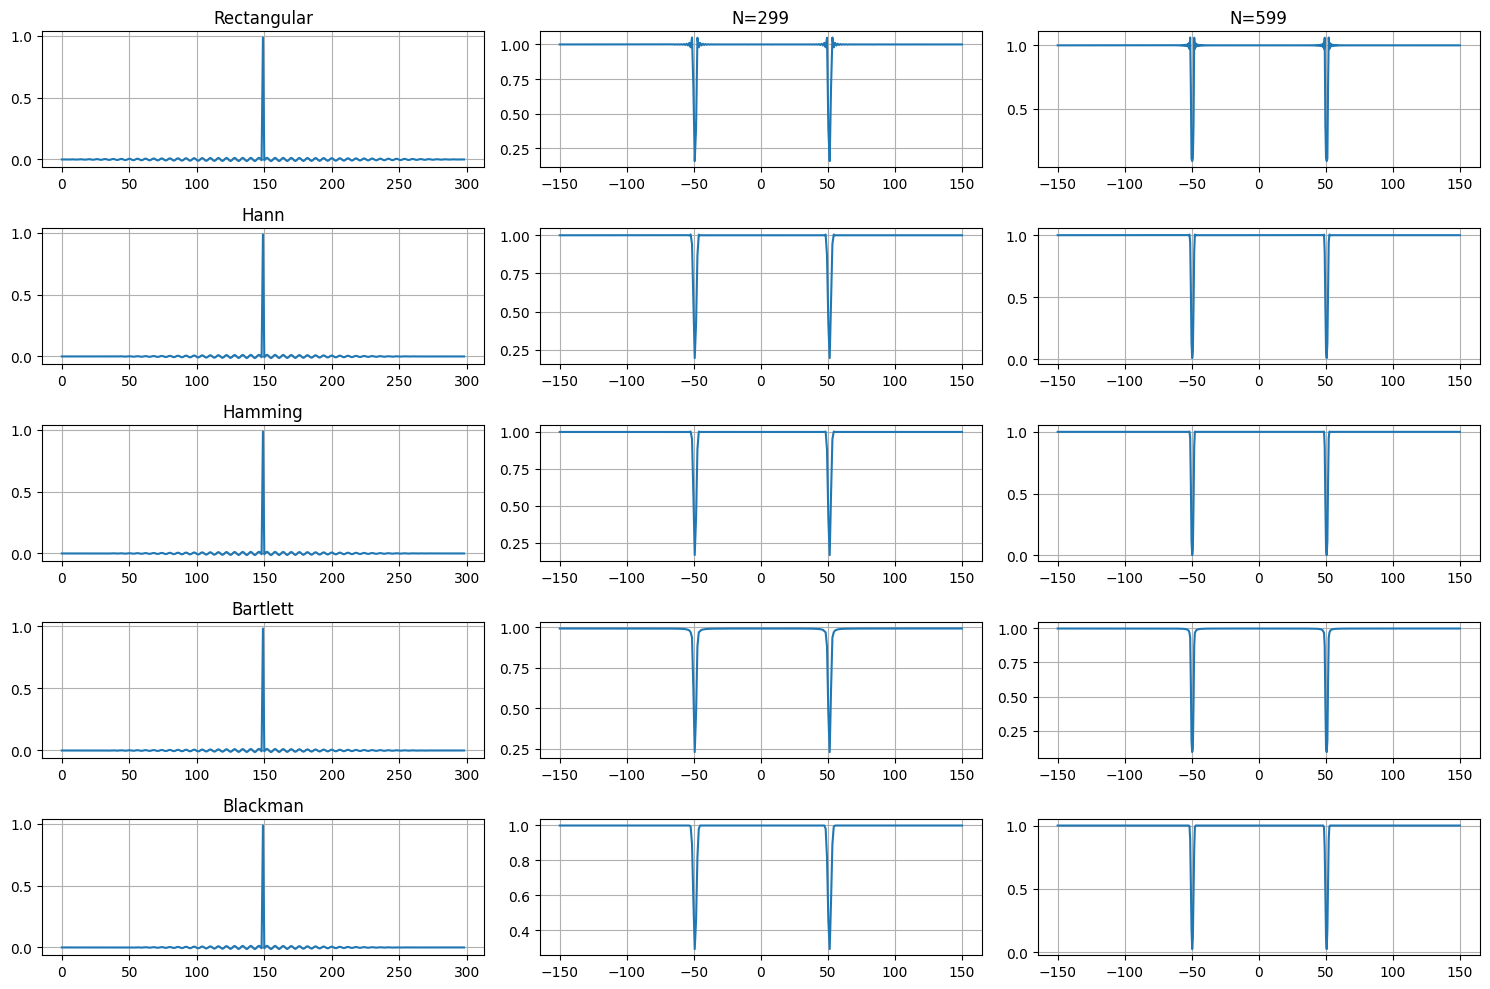

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin
from ventanas import rectangular, hann, hamming, bartlett, blackman

def retardar(X,i):
    N = len(X)
    k = np.arange(N)
    exp = np.exp(-2j*np.pi*k*i/N)
    Xret = X*exp
    return Xret

def rechazabandaFreq(N,f1,f2):
    k = np.arange(N)
    f = k / N       # valores de frecuencia normalizados
    H = np.ones(N, dtype=complex)
    H[(f >= f1) & (f <= f2)] = 0
    H[(f >= (1 - f2)) & (f <= (1 - f1))] = 0
    return H

def FIRRechazaBanda(N, f1, f2, W):
    sobremuestreo = 10
    M = N*sobremuestreo

    # Respuesta en frecuencia
    H = rechazabandaFreq(M,f1,f2)

    # retardar
    H = retardar(H,M/2)     # sobremuestreo de 10 fuerza a M par

    # Antitransformar
    h = np.fft.ifft(H).real

    # Aplicar ventana a las N centrales
    mid = M//2
    ini = mid - N//2
    h = W(h,ini,ini+N)

    # Retornar las N centrales
    return h[ini:ini+N]

# Parametros
fm = 300
fmin = 49/fm
fmax = 51/fm
longitud = 299
longitud2 = 599

# Generar Filtros
hrectangular = FIRRechazaBanda(longitud,fmin,fmax,rectangular)
hhann = FIRRechazaBanda(longitud,fmin,fmax,hann)
hhamming = FIRRechazaBanda(longitud,fmin,fmax,hamming)
hbartlett = FIRRechazaBanda(longitud,fmin,fmax,bartlett)
hblackman = FIRRechazaBanda(longitud,fmin,fmax,blackman)
hrectangular2 = FIRRechazaBanda(longitud2,fmin,fmax,rectangular)
hhann2 = FIRRechazaBanda(longitud2,fmin,fmax,hann)
hhamming2 = FIRRechazaBanda(longitud2,fmin,fmax,hamming)
hbartlett2 = FIRRechazaBanda(longitud2,fmin,fmax,bartlett)
hblackman2 = FIRRechazaBanda(longitud2,fmin,fmax,blackman)

# Acomodar para graficar bien
f = np.linspace(0,fm,longitud)-(fm//2)
f2 = np.linspace(0,fm,longitud2)-(fm//2)
Hrectangular = np.fft.fft(hrectangular)
Hrectangular = np.concatenate([Hrectangular[longitud//2:],Hrectangular[:longitud//2]])
Hrectangular2 = np.fft.fft(hrectangular2)
Hrectangular2 = np.concatenate([Hrectangular2[longitud2//2:],Hrectangular2[:longitud2//2]])
Hhann = np.fft.fft(hhann)
Hhann = np.concatenate([Hhann[longitud//2:],Hhann[:longitud//2]])
Hhann2 = np.fft.fft(hhann2)
Hhann2 = np.concatenate([Hhann2[longitud2//2:],Hhann2[:longitud2//2]])
Hhamming = np.fft.fft(hhamming)
Hhamming = np.concatenate([Hhamming[longitud//2:],Hhamming[:longitud//2]])
Hhamming2 = np.fft.fft(hhamming2)
Hhamming2 = np.concatenate([Hhamming2[longitud2//2:],Hhamming2[:longitud2//2]])
Hbartlett = np.fft.fft(hbartlett)
Hbartlett = np.concatenate([Hbartlett[longitud//2:],Hbartlett[:longitud//2]])
Hbartlett2 = np.fft.fft(hbartlett2)
Hbartlett2 = np.concatenate([Hbartlett2[longitud2//2:],Hbartlett2[:longitud2//2]])
Hblackman = np.fft.fft(hblackman)
Hblackman = np.concatenate([Hblackman[longitud//2:],Hblackman[:longitud//2]])
Hblackman2 = np.fft.fft(hblackman2)
Hblackman2 = np.concatenate([Hblackman2[longitud2//2:],Hblackman2[:longitud2//2]])

# Graficar
fig, ax = plt.subplots(5,3)
fig.set_figheight(10)
fig.set_figwidth(15)
for axi in ax:
    for axj in axi:
        axj.grid()

ax[0][0].plot(hrectangular, label='propia')
ax[0][0].set_title('Rectangular')
ax[1][0].plot(hhann, label='propia')
ax[1][0].set_title('Hann')
ax[2][0].plot(hhamming, label='propia')
ax[2][0].set_title('Hamming')
ax[3][0].plot(hbartlett, label='propia')
ax[3][0].set_title('Bartlett')
ax[4][0].plot(hblackman, label='propia')
ax[4][0].set_title('Blackman')

ax[0][1].plot(f, np.abs(Hrectangular), label='propia')
ax[0][1].set_title(f"N={longitud}")
ax[0][2].plot(f2, np.abs(Hrectangular2), label='propia')
ax[0][2].set_title(f"N={longitud2}")
ax[1][1].plot(f, np.abs(Hhann), label='propia')
ax[1][2].plot(f2, np.abs(Hhann2), label='propia')
ax[2][1].plot(f, np.abs(Hhamming), label='propia')
ax[2][2].plot(f2, np.abs(Hhamming2), label='propia')
ax[3][1].plot(f, np.abs(Hbartlett), label='propia')
ax[3][2].plot(f2, np.abs(Hbartlett2), label='propia')
ax[4][1].plot(f, np.abs(Hblackman), label='propia')
ax[4][2].plot(f2, np.abs(Hblackman2), label='propia')
fig.tight_layout()

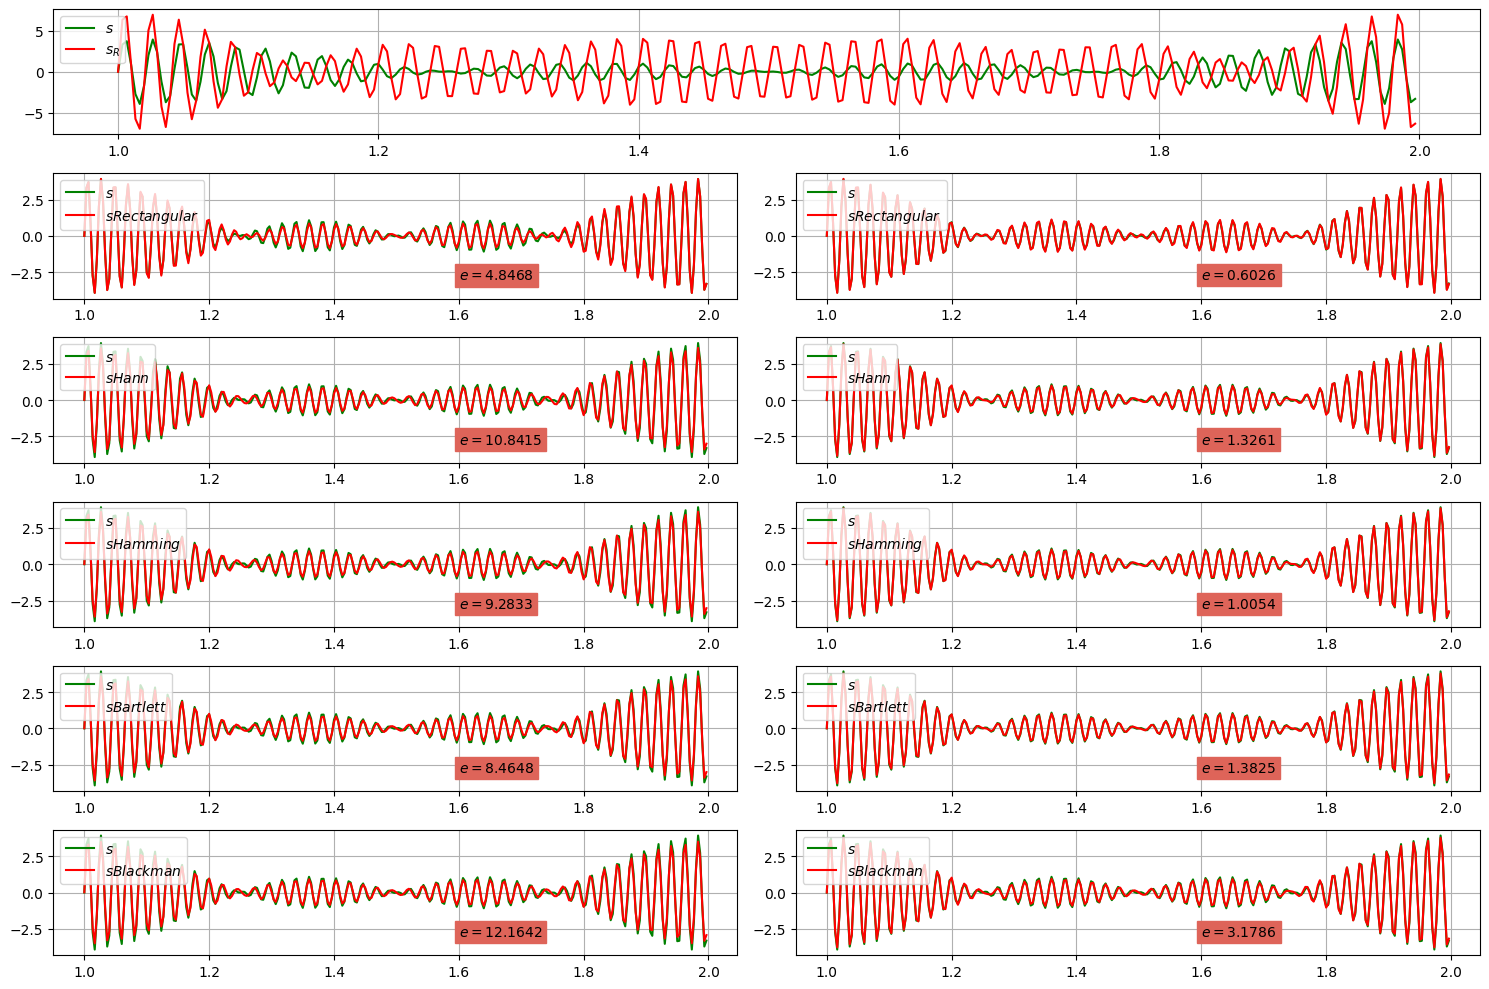

In [2]:
import random

def ECT(y,yapprox):
    return np.sum(np.power(y-yapprox,[2]*len(y)))

# Parametros
Tini = 0
Tfin = 5
fm = 300

# Generar senial con un ruido de 50Hz
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)

s = [0 for _ in range(len(t))]      # senial limpia
iRuido = random.random()*4+1        # intensidad del ruido de 50Hz
sr = iRuido*np.sin(2*np.pi*50*t)    # senial con ruido
for f in range(45,49):
    A = random.random()*4+1
    s += np.sin(2*np.pi*f*t)
    sr += np.sin(2*np.pi*f*t)

# Filtrar senial
fmin = 49/fm
fmax = 51/fm
filtroRectangular = FIRRechazaBanda(149,fmin,fmax,rectangular)
filtroHann = FIRRechazaBanda(149,fmin,fmax,hann)
filtroHamming = FIRRechazaBanda(149,fmin,fmax,hamming)
filtroBartlett = FIRRechazaBanda(149,fmin,fmax,bartlett)
filtroBlackman = FIRRechazaBanda(149,fmin,fmax,blackman)
filtroRectangular2 = FIRRechazaBanda(301,fmin,fmax,rectangular)
filtroHann2 = FIRRechazaBanda(301,fmin,fmax,hann)
filtroHamming2 = FIRRechazaBanda(301,fmin,fmax,hamming)
filtroBartlett2 = FIRRechazaBanda(301,fmin,fmax,bartlett)
filtroBlackman2 = FIRRechazaBanda(301,fmin,fmax,blackman)

sRectangular = np.convolve(s,filtroRectangular,mode='same')
sHann = np.convolve(s,filtroHann,mode='same')
sHamming = np.convolve(s,filtroHamming,mode='same')
sBartlett = np.convolve(s,filtroBartlett,mode='same')
sBlackman = np.convolve(s,filtroBlackman,mode='same')

sRectangular2 = np.convolve(s,filtroRectangular2,mode='same')
sHann2 = np.convolve(s,filtroHann2,mode='same')
sHamming2 = np.convolve(s,filtroHamming2,mode='same')
sBartlett2 = np.convolve(s,filtroBartlett2,mode='same')
sBlackman2 = np.convolve(s,filtroBlackman2,mode='same')

# Graficar
fig = plt.figure()
ax = [
    plt.subplot2grid([6,1],[0,0]),
    plt.subplot2grid([6,2],[1,0]),
    plt.subplot2grid([6,2],[1,1]),
    plt.subplot2grid([6,2],[2,0]),
    plt.subplot2grid([6,2],[2,1]),
    plt.subplot2grid([6,2],[3,0]),
    plt.subplot2grid([6,2],[3,1]),
    plt.subplot2grid([6,2],[4,0]),
    plt.subplot2grid([6,2],[4,1]),
    plt.subplot2grid([6,2],[5,0]),
    plt.subplot2grid([6,2],[5,1]),
]
fig.set_figheight(10)
fig.set_figwidth(15)
for axi in ax:
    axi.grid()

ax[0].plot(t[fm:2*fm],s[fm:2*fm],label='$s$',color='g')
ax[0].plot(t[fm:2*fm],sr[fm:2*fm],label='$s_R$',color='r')
ax[0].legend(loc='upper left')

ax[1].plot(t[fm:2*fm],s[fm:2*fm],label='$s$', color='g')
ax[1].plot(t[fm:2*fm],sRectangular[fm:2*fm],label='$sRectangular$', color='r')
ax[1].legend(loc='upper left')
ax[1].text(1.6, -3, "$e = %.4f$" % np.abs(ECT(s[fm:2*fm],sRectangular[fm:2*fm])),
    fontsize=10,
    transform=ax[1].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

ax[2].plot(t[fm:2*fm],s[fm:2*fm],label='$s$', color='g')
ax[2].plot(t[fm:2*fm],sRectangular2[fm:2*fm],label='$sRectangular$', color='r')
ax[2].legend(loc='upper left')
ax[2].text(1.6, -3, "$e = %.4f$" % np.abs(ECT(s[fm:2*fm],sRectangular2[fm:2*fm])),
    fontsize=10,
    transform=ax[2].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

ax[3].plot(t[fm:2*fm],s[fm:2*fm],label='$s$', color='g')
ax[3].plot(t[fm:2*fm],sHann[fm:2*fm],label='$sHann$', color='r')
ax[3].legend(loc='upper left')
ax[3].text(1.6, -3, "$e = %.4f$" % np.abs(ECT(s[fm:2*fm],sHann[fm:2*fm])),
    fontsize=10,
    transform=ax[3].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

ax[4].plot(t[fm:2*fm],s[fm:2*fm],label='$s$', color='g')
ax[4].plot(t[fm:2*fm],sHann2[fm:2*fm],label='$sHann$', color='r')
ax[4].legend(loc='upper left')
ax[4].text(1.6, -3, "$e = %.4f$" % np.abs(ECT(s[fm:2*fm],sHann2[fm:2*fm])),
    fontsize=10,
    transform=ax[4].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

ax[5].plot(t[fm:2*fm],s[fm:2*fm],label='$s$', color='g')
ax[5].plot(t[fm:2*fm],sHamming[fm:2*fm],label='$sHamming$', color='r')
ax[5].legend(loc='upper left')
ax[5].text(1.6, -3, "$e = %.4f$" % np.abs(ECT(s[fm:2*fm],sHamming[fm:2*fm])),
    fontsize=10,
    transform=ax[5].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

ax[6].plot(t[fm:2*fm],s[fm:2*fm],label='$s$', color='g')
ax[6].plot(t[fm:2*fm],sHamming2[fm:2*fm],label='$sHamming$', color='r')
ax[6].legend(loc='upper left')
ax[6].text(1.6, -3, "$e = %.4f$" % np.abs(ECT(s[fm:2*fm],sHamming2[fm:2*fm])),
    fontsize=10,
    transform=ax[6].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

ax[7].plot(t[fm:2*fm],s[fm:2*fm],label='$s$', color='g')
ax[7].plot(t[fm:2*fm],sBartlett[fm:2*fm],label='$sBartlett$', color='r')
ax[7].legend(loc='upper left')
ax[7].text(1.6, -3, "$e = %.4f$" % np.abs(ECT(s[fm:2*fm],sBartlett[fm:2*fm])),
    fontsize=10,
    transform=ax[7].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

ax[8].plot(t[fm:2*fm],s[fm:2*fm],label='$s$', color='g')
ax[8].plot(t[fm:2*fm],sBartlett2[fm:2*fm],label='$sBartlett$', color='r')
ax[8].legend(loc='upper left')
ax[8].text(1.6, -3, "$e = %.4f$" % np.abs(ECT(s[fm:2*fm],sBartlett2[fm:2*fm])),
    fontsize=10,
    transform=ax[8].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

ax[9].plot(t[fm:2*fm],s[fm:2*fm],label='$s$', color='g')
ax[9].plot(t[fm:2*fm],sBlackman[fm:2*fm],label='$sBlackman$', color='r')
ax[9].legend(loc='upper left')
ax[9].text(1.6, -3, "$e = %.4f$" % np.abs(ECT(s[fm:2*fm],sBlackman[fm:2*fm])),
    fontsize=10,
    transform=ax[9].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

ax[10].plot(t[fm:2*fm],s[fm:2*fm],label='$s$', color='g')
ax[10].plot(t[fm:2*fm],sBlackman2[fm:2*fm],label='$sBlackman$', color='r')
ax[10].legend(loc='upper left')
ax[10].text(1.6, -3, "$e = %.4f$" % np.abs(ECT(s[fm:2*fm],sBlackman2[fm:2*fm])),
    fontsize=10,
    transform=ax[10].transData,
    bbox=dict(boxstyle='square', color='#DE6459'))

fig.tight_layout()